In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression, mutual_info_regression, mutual_info_classif
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

%matplotlib inline

In [95]:
pklfile = '~/sims_n_results/nucmoles_opusupdate_aug2019/not-scaled_15nuc.pkl'
XY = pd.read_pickle(pklfile)
XY.reset_index(inplace=True, drop=True)
if 'total' in XY.columns:
    XY.drop('total', axis=1, inplace=True)
lbls = ['ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor']
ratios = XY.loc[:, lbls].copy()

#cs137/cs133
ratios['cs137/cs133'] = XY['cs137'] / XY['cs133']
#cs134/cs137
ratios['cs134/cs137'] = XY['cs134'] / XY['cs137']
#cs135/cs137
ratios['cs135/cs137'] = XY['cs135'] / XY['cs137']
#ba136/ba138
ratios['ba136/ba138'] = XY['ba136'] / XY['ba138']
#sm150/sm149
ratios['sm150/sm149'] = XY['sm150'] / XY['sm149']
#sm152/sm149
ratios['sm152/sm149'] = XY['sm152'] / XY['sm149']
#eu154/eu153
ratios['eu154/eu153'] = XY['eu154'] / XY['eu153']
#pu240/pu239
ratios['pu240/pu239'] = XY['pu240'] / XY['pu239']
#pu241/pu239
ratios['pu241/pu239'] = XY['pu241'] / XY['pu239']
#pu242/pu239
ratios['pu242/pu239'] = XY['pu242'] / XY['pu239']

ratios.replace([np.inf, -np.inf], 0, inplace=True)
ratios.fillna(0, inplace = True)

XY = XY.loc[XY['Burnup'] > 0]
ratios = ratios.loc[ratios['Burnup'] > 0]

X = XY.drop(lbls, axis=1)
ratiosX = ratios.drop(lbls, axis=1)

In [96]:
X.columns, ratiosX.columns

(Index(['ba136', 'ba138', 'cs133', 'cs134', 'cs135', 'cs137', 'eu153', 'eu154',
        'pu239', 'pu240', 'pu241', 'pu242', 'sm149', 'sm150', 'sm152'],
       dtype='object'),
 Index(['cs137/cs133', 'cs134/cs137', 'cs135/cs137', 'ba136/ba138',
        'sm150/sm149', 'sm152/sm149', 'eu154/eu153', 'pu240/pu239',
        'pu241/pu239', 'pu242/pu239'],
       dtype='object'))

# Feature Distrubitions

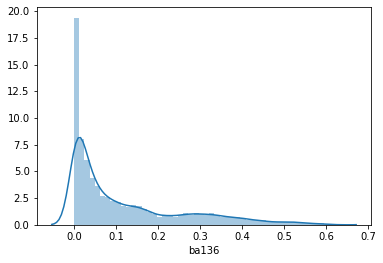

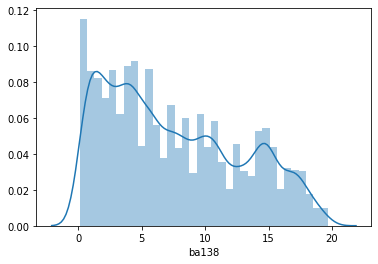

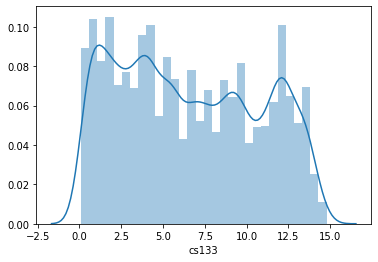

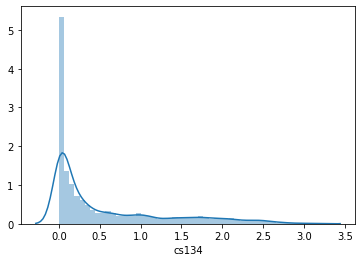

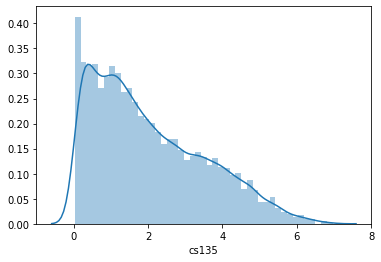

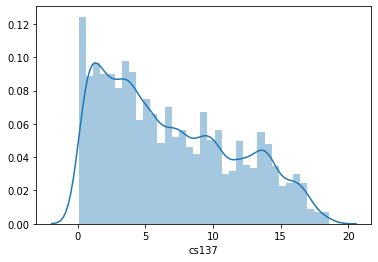

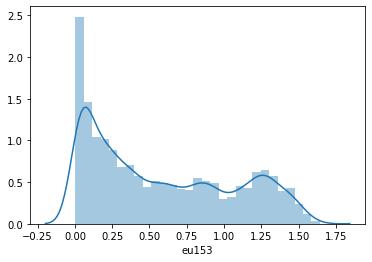

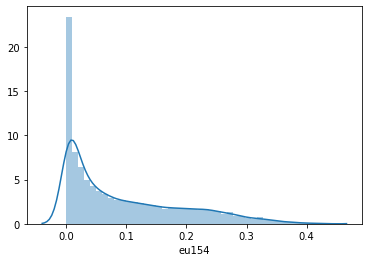

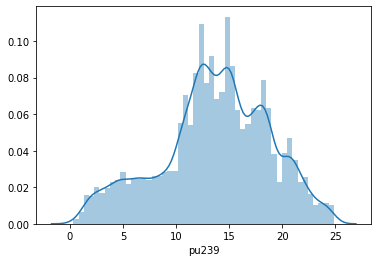

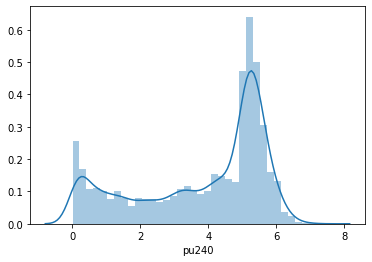

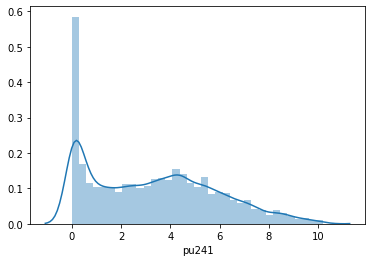

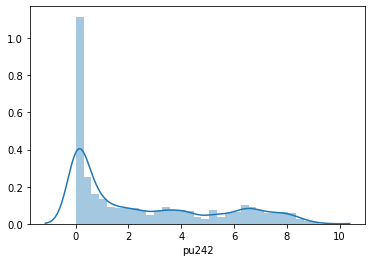

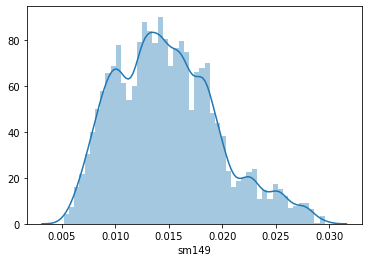

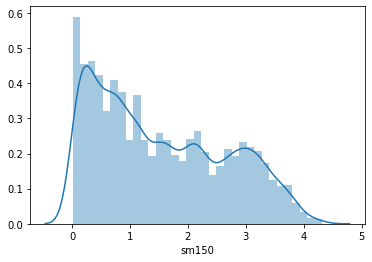

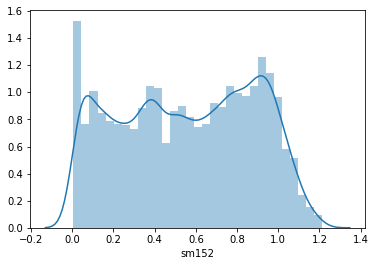

In [16]:
for iso in X.columns.tolist():
    sns.distplot(X[iso])
    plt.show()

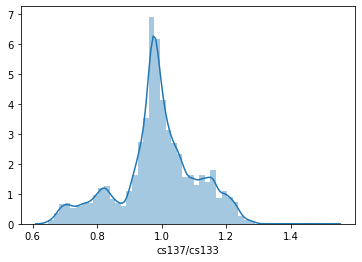

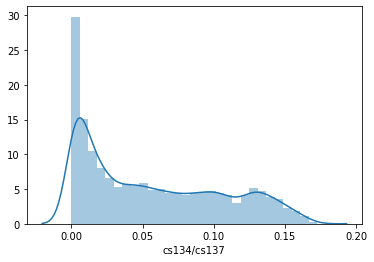

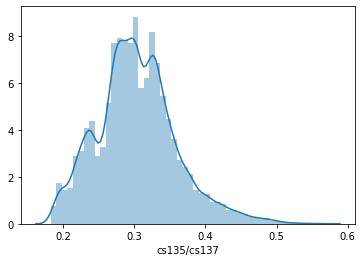

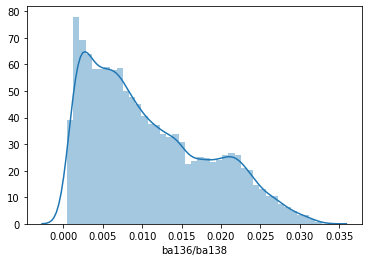

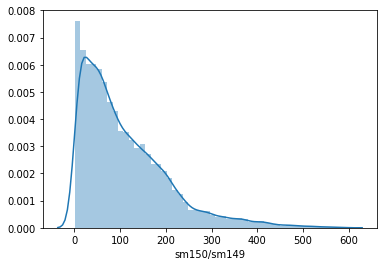

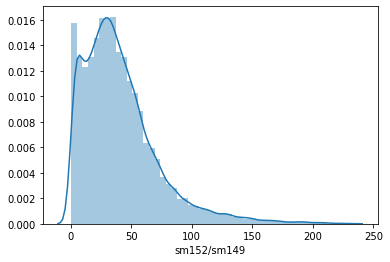

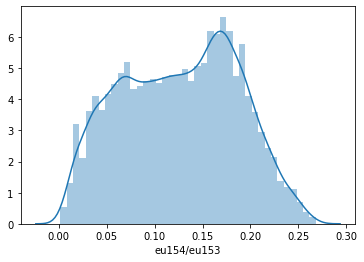

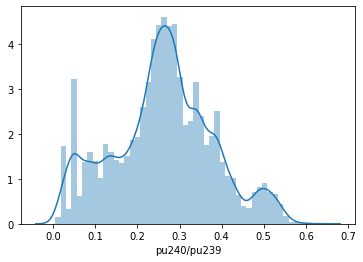

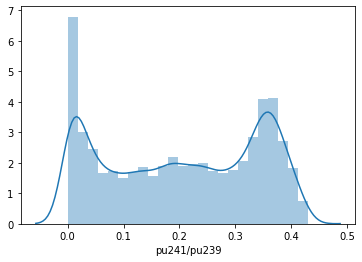

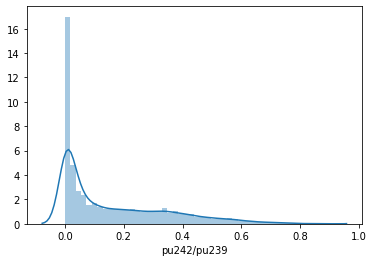

In [18]:
for ratio in ratiosX.columns.tolist():
    sns.distplot(ratiosX[ratio])
    plt.show()

# Feature Importance
## Using Decision Trees

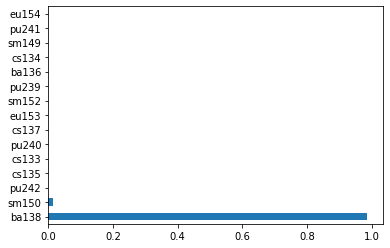

In [46]:
burn = XY['Burnup']
model = DecisionTreeRegressor()
model.fit(X,burn)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

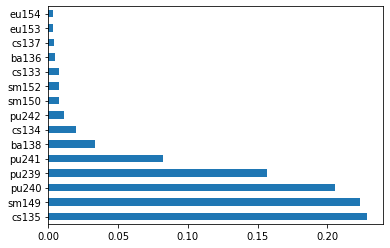

In [47]:
rxtr = XY['ReactorType']
model = DecisionTreeClassifier()
model.fit(X,rxtr)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

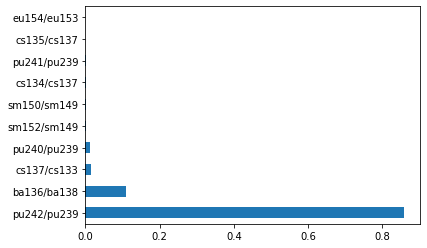

In [48]:
burn_r = ratios['Burnup']
model = DecisionTreeRegressor()
model.fit(ratiosX,burn_r)
feat_importances = pd.Series(model.feature_importances_, index=ratiosX.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

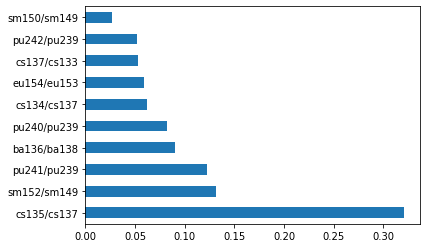

In [49]:
rxtr_r = ratios['ReactorType']
model = DecisionTreeClassifier()
model.fit(ratiosX,rxtr_r)
feat_importances = pd.Series(model.feature_importances_, index=ratiosX.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Using KBest Feature Selection

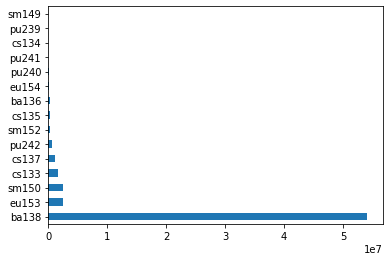

In [58]:
bestfeatures = SelectKBest(score_func=f_regression, k=15)
fit = bestfeatures.fit(X,burn)
feat_scores = pd.Series(fit.scores_, index=X.columns)
feat_scores.nlargest(15).plot(kind='barh')
plt.show()

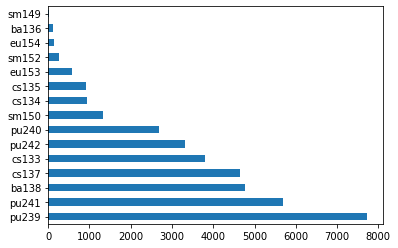

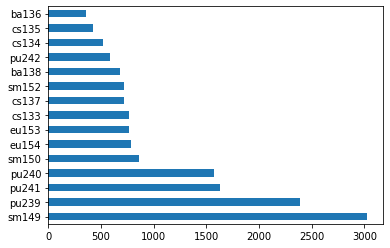

In [60]:
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X,rxtr)
feat_scores = pd.Series(fit.scores_, index=X.columns)
feat_scores.nlargest(15).plot(kind='barh')
plt.show()
bestfeatures = SelectKBest(score_func=f_classif, k=15)
fit = bestfeatures.fit(X,rxtr)
feat_scores = pd.Series(fit.scores_, index=X.columns)
feat_scores.nlargest(15).plot(kind='barh')
plt.show()

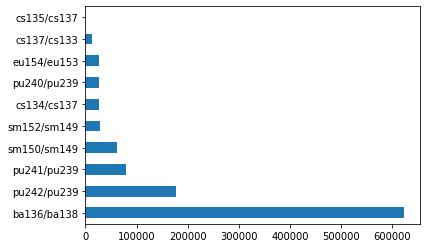

In [61]:
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(ratiosX,burn_r)
feat_scores = pd.Series(fit.scores_, index=ratiosX.columns)
feat_scores.nlargest(10).plot(kind='barh')
plt.show()

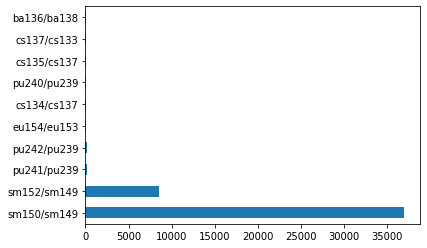

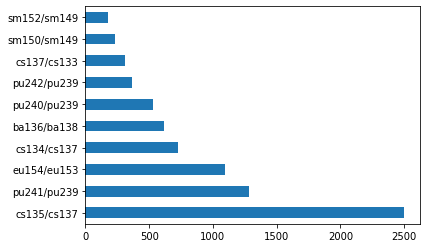

In [63]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(ratiosX,rxtr_r)
feat_scores = pd.Series(fit.scores_, index=ratiosX.columns)
feat_scores.nlargest(10).plot(kind='barh')
plt.show()
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(ratiosX,rxtr_r)
feat_scores = pd.Series(fit.scores_, index=ratiosX.columns)
feat_scores.nlargest(10).plot(kind='barh')
plt.show()

# Correlation Matrices

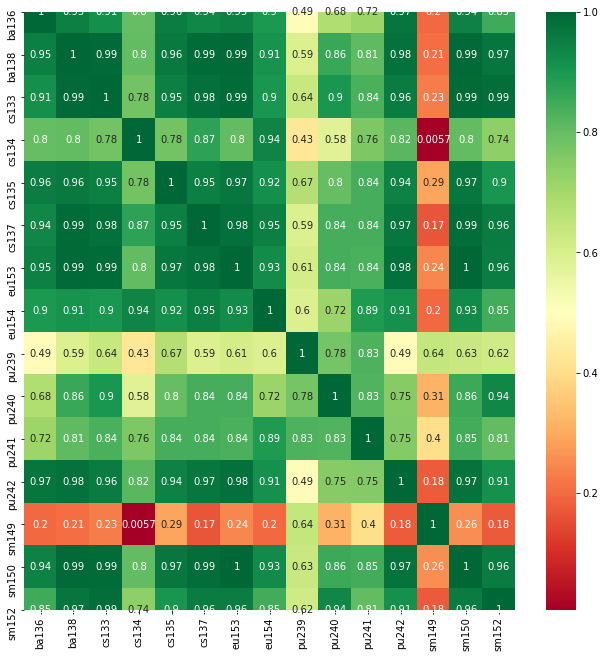

In [31]:
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(11,11))
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

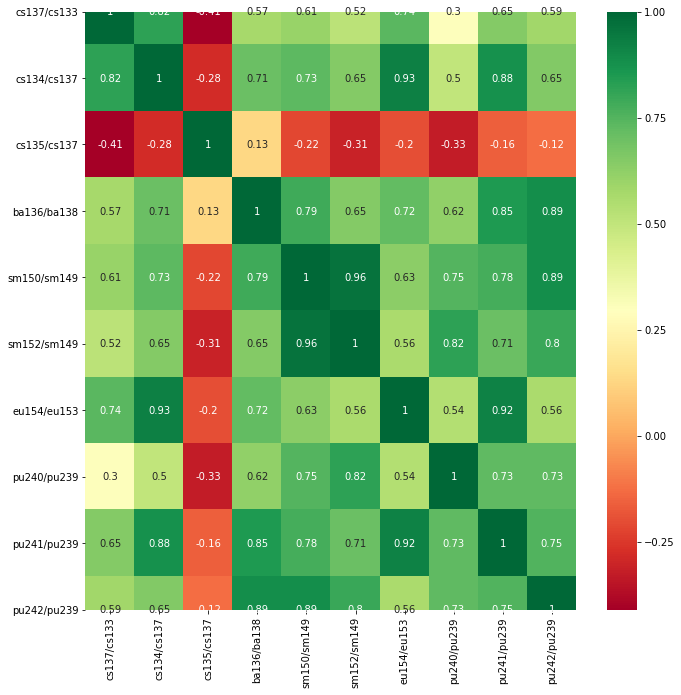

In [30]:
corrmat = ratiosX.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(11,11))
g=sns.heatmap(ratiosX[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Selection from full DB

In [105]:
pklfile = '~/sims_n_results/nucmoles_opusupdate_aug2019/not-scaled_fissact.pkl'
XY = pd.read_pickle(pklfile)
XY.reset_index(inplace=True, drop=True)
XY = XY.loc[XY['Burnup'] > 0]
if 'total' in XY.columns:
    XY.drop('total', axis=1, inplace=True)
lbls = ['ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor']
X = XY.drop(lbls, axis=1)

In [106]:
burn = XY['Burnup']
rxtr = XY['ReactorType']
X.columns

Index(['ba138', 'ce140', 'ce142', 'ce144', 'cs133', 'cs135', 'cs137', 'la139',
       'mo100', 'mo95', 'mo97', 'mo98', 'nd143', 'nd144', 'nd145', 'nd146',
       'pd104', 'pd105', 'pd106', 'pr141', 'pu239', 'pu240', 'pu241', 'pu242',
       'rb87', 'rh103', 'ru101', 'ru102', 'ru104', 'sr88', 'sr90', 'tc99',
       'te130', 'u234', 'u235', 'u236', 'u238', 'xe131', 'xe132', 'xe134',
       'xe136', 'y89', 'zr91', 'zr92', 'zr93', 'zr94', 'zr96'],
      dtype='object')

## Decision Trees

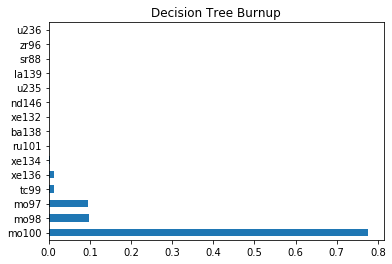

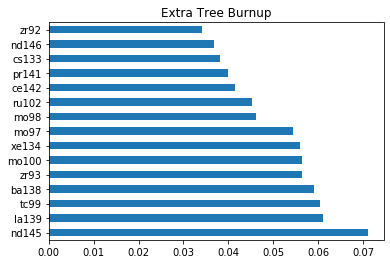

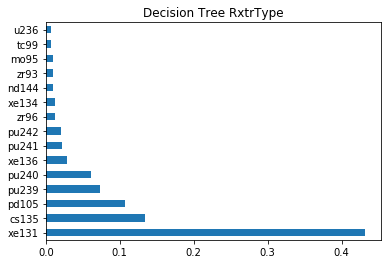

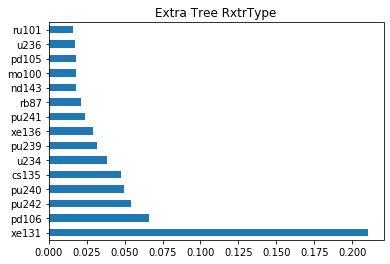

In [141]:
model = DecisionTreeRegressor()
model = model.fit(X,burn)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
dtree_burn = feat_importances.nlargest(15)
dtree_burn.plot(kind='barh')
plt.title('Decision Tree Burnup')
plt.show()
model = ExtraTreesRegressor(n_estimators=50)
model = model.fit(X, burn)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
etree_burn = feat_importances.nlargest(15)
etree_burn.plot(kind='barh')
plt.title('Extra Tree Burnup')
plt.show()

model = DecisionTreeClassifier()
model = model.fit(X,rxtr)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
dtree_rxtr = feat_importances.nlargest(15)
dtree_rxtr.plot(kind='barh')
plt.title('Decision Tree RxtrType')
plt.show()
model = ExtraTreesClassifier(n_estimators=50)
model = model.fit(X, rxtr)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
etree_rxtr = feat_importances.nlargest(15)
etree_rxtr.plot(kind='barh')
plt.title('Extra Tree RxtrType')
plt.show()

## KBest Feature Selection

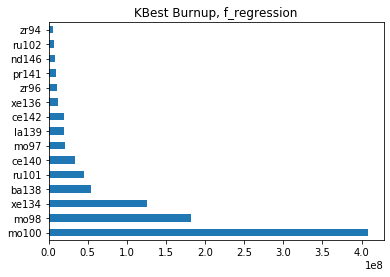

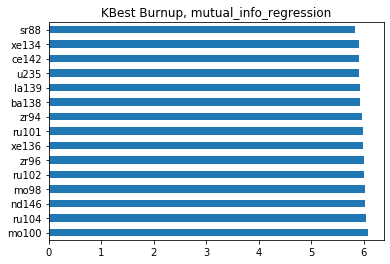

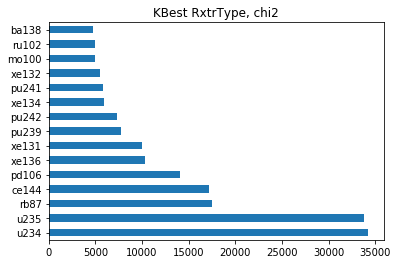

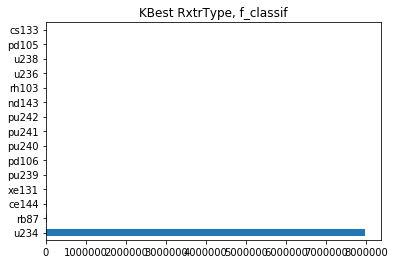

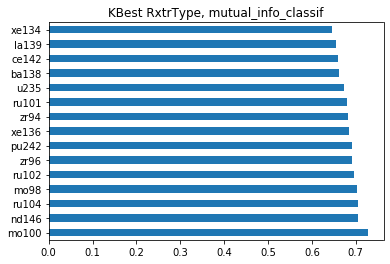

In [123]:
bestfeatures = SelectKBest(score_func=f_regression, k=15)
fit = bestfeatures.fit(X,burn)
feat_scores = pd.Series(fit.scores_, index=X.columns)
kbest_f_burn = feat_scores.nlargest(15)
kbest_f_burn.plot(kind='barh')
plt.title('KBest Burnup, f_regression')
plt.show()
bestfeatures = SelectKBest(score_func=mutual_info_regression, k=15)
fit = bestfeatures.fit(X,burn)
feat_scores = pd.Series(fit.scores_, index=X.columns)
kbest_mi_burn = feat_scores.nlargest(15)
kbest_mi_burn.plot(kind='barh')
plt.title('KBest Burnup, mutual_info_regression')
plt.show()

bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X,rxtr)
feat_scores = pd.Series(fit.scores_, index=X.columns)
kbest_chi_rxtr = feat_scores.nlargest(15)
kbest_chi_rxtr.plot(kind='barh')
plt.title('KBest RxtrType, chi2')
plt.show()
bestfeatures = SelectKBest(score_func=f_classif, k=15)
fit = bestfeatures.fit(X,rxtr)
feat_scores = pd.Series(fit.scores_, index=X.columns)
kbest_f_rxtr = feat_scores.nlargest(15)
kbest_f_rxtr.plot(kind='barh')
plt.title('KBest RxtrType, f_classif')
plt.show()
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=15)
fit = bestfeatures.fit(X,rxtr)
feat_scores = pd.Series(fit.scores_, index=X.columns)
kbest_mi_rxtr = feat_scores.nlargest(15)
kbest_mi_rxtr.plot(kind='barh')
plt.title('KBest RxtrType, mutual_info_classif')
plt.show()

In [154]:
burns = [x.index.tolist() for x in [dtree_burn, etree_burn]]#, kbest_f_burn, kbest_mi_burn]]
rxtrs = [x.index.tolist() for x in [dtree_rxtr, etree_rxtr]]#, kbest_chi_rxtr, kbest_mi_rxtr]] 
burn_isos = list(set.intersection(*map(set,burns)))
rxtr_isos = list(set.intersection(*map(set,rxtrs)))

In [155]:
#dtrees
burn_isos, rxtr_isos

(['mo100', 'ba138', 'xe134', 'la139', 'nd146', 'tc99', 'mo97', 'mo98'],
 ['pd105',
  'pu241',
  'pu242',
  'cs135',
  'u236',
  'pu239',
  'xe131',
  'xe136',
  'pu240'])

In [156]:
burns = [x.index.tolist() for x in [kbest_f_burn, kbest_mi_burn]] 
rxtrs = [x.index.tolist() for x in [kbest_chi_rxtr, kbest_mi_rxtr]]
burn_isos = list(set.intersection(*map(set,burns)))
rxtr_isos = list(set.intersection(*map(set,rxtrs)))

In [157]:
#kbest
burn_isos, rxtr_isos

(['zr96',
  'ru102',
  'mo100',
  'ba138',
  'xe134',
  'nd146',
  'zr94',
  'la139',
  'ru101',
  'ce142',
  'xe136',
  'mo98'],
 ['ru102', 'mo100', 'pu242', 'ba138', 'u235', 'xe134', 'xe136'])